In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df1 = pd.read_csv ('1-FirstTenSignals.csv')
df1.head()

I01       I02       I03       I04       I05       I06       I07  \
0  3.970588  2.333333  3.966378  3.379443 -1.891451  1.758333 -0.195833   
1  3.954248  2.330065  3.978866  3.378482 -1.892411  1.770833 -0.187500   
2  3.934641  2.297386  3.970221  3.381364 -1.890490  1.775000 -0.204167   
3  3.950980  2.281046  3.961575  3.381364 -1.887608  1.766667 -0.200000   
4  4.013072  2.290850  3.932757  3.365034 -1.883766  1.787500 -0.191667   

        I08       I09       I10  
0  3.284109  3.925197  1.775591  
1  3.268058  3.937008  1.771654  
2  3.264848  3.956693  1.771654  
3  3.264848  3.984252  1.783465  
4  3.258427  4.000000  1.755906

In [11]:
help(nk.data)

Help on function data in module neurokit2.data.data:

data(dataset='bio_eventrelated_100hz')
    Download example datasets.
    
    Download and load available `example datasets <https://github.com/neuropsychology/NeuroKit/tree/master/data#datasets>`_.
    Note that an internet connexion is necessary.
    
    Parameters
    ----------
    dataset : str
        The name of the dataset. The list and description is
        available `here <https://neurokit2.readthedocs.io/en/master/datasets.html#>`_.
    
    Returns
    -------
    DataFrame
        The data.
    
    
    Examples
    ---------
    >>> import neurokit2 as nk
    >>>
    >>> data = nk.data("bio_eventrelated_100hz")



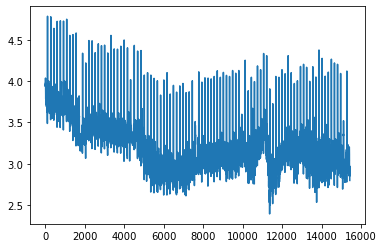

In [3]:
signal = df1['I01']
plt.plot(signal)

In [4]:
freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

In [5]:
rpeaks

{'ECG_R_Peaks': array([  107,   271,   433,   595,   757,   917,  1078,  1237,  1396,
         1556,  1884,  2043,  2203,  2364,  2522,  2680,  2840,  2998,
         3158,  3321,  3485,  3651,  3820,  3988,  4157,  4502,  4672,
         4842,  5009,  5175,  5343,  5506,  5672,  5835,  5999,  6162,
         6322,  6485,  6646,  6807,  6967,  7127,  7283,  7442,  7550,
         7768,  7926,  8082,  8240,  8395,  8550,  8707,  8861,  9016,
         9173,  9328,  9483,  9641,  9797, 10119, 10275, 10433, 10515,
        10744, 10900, 11055, 11209, 11365, 11519, 11674, 11830, 11985,
        12142, 12299, 12453, 12610, 12766, 12922, 13078, 13233, 13390,
        13547, 13859, 14017, 14173, 14331, 14487, 14643, 14799, 14955,
        15271]),
 'sampling_rate': 257}

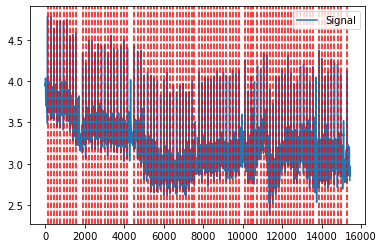

In [6]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal)

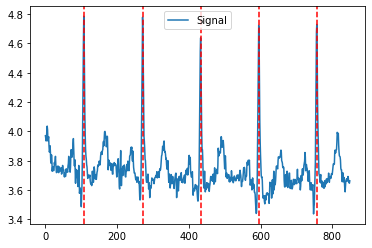

In [7]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], signal[:850])

In [8]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="peak")

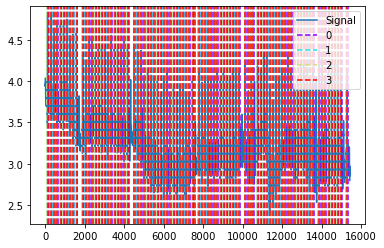

In [9]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

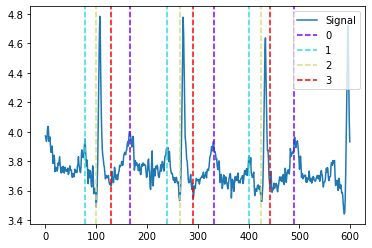

In [36]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]],signal[:600])

In [10]:
help(nk.ecg_delineate)

Help on function ecg_delineate in module neurokit2.ecg.ecg_delineate:

ecg_delineate(ecg_cleaned, rpeaks=None, sampling_rate=1000, method='dwt', show=False, show_type='peaks', check=False)
    Delineate QRS complex.
    
    Function to delineate the QRS complex.
    
    - **Cardiac Cycle**: A typical ECG heartbeat consists of a P wave, a QRS complex and a T wave.
      The P wave represents the wave of depolarization that spreads from the SA-node throughout the atria.
      The QRS complex reflects the rapid depolarization of the right and left ventricles. Since the
      ventricles are the largest part of the heart, in terms of mass, the QRS complex usually has a much
      larger amplitude than the P-wave. The T wave represents the ventricular repolarization of the
      ventricles.On rare occasions, a U wave can be seen following the T wave. The U wave is believed
      to be related to the last remnants of ventricular repolarization.
    
    Parameters
    ----------
    ecg_cle

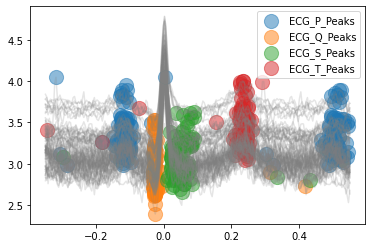

In [13]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="peak", show=True, show_type='peaks')

Provo con un campione più piccolo, prendo solo i primi 850 valori

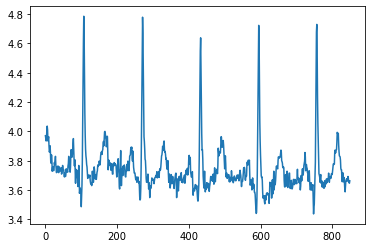

In [45]:
signal = df1['I01'][:850]
plt.plot(signal)

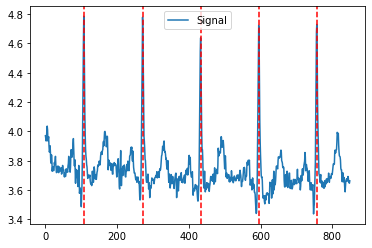

In [46]:
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal)

In [47]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="peak")

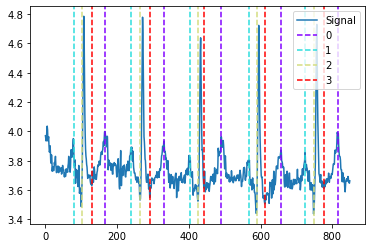

In [48]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

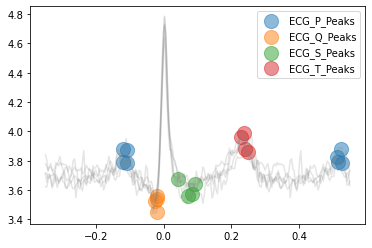

In [49]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="peak", show=True, show_type='peaks')

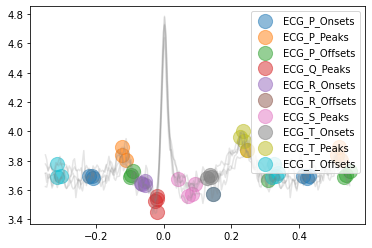

In [54]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="cwt", show=True, show_type='all')

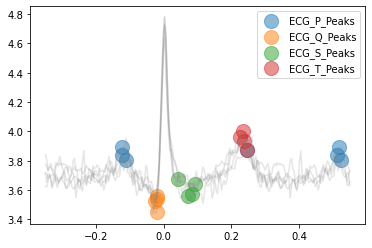

In [56]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="cwt", show=True, show_type='peaks')

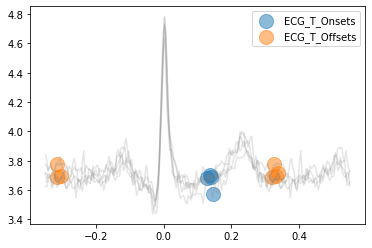

In [57]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="cwt", show=True, show_type='bounds_T')

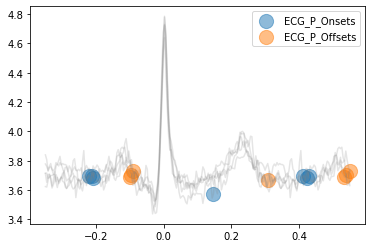

In [58]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="cwt", show=True, show_type='bounds_P')

# c'è qualche problemino qui, mi prende dentro anche la T wave

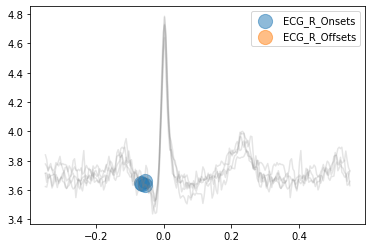

In [59]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="cwt", show=True, show_type='bounds_R')

# qui manco mi trova R offset

Altro metodo che fa le stesse cose ma in un contesto discreto (discrete wavelet functions)

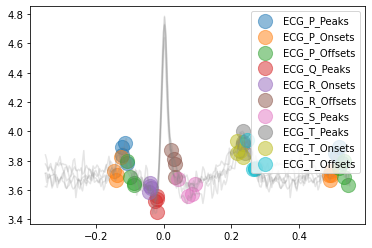

In [60]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='all')

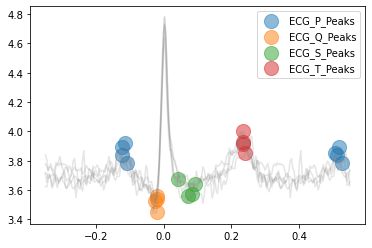

In [62]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

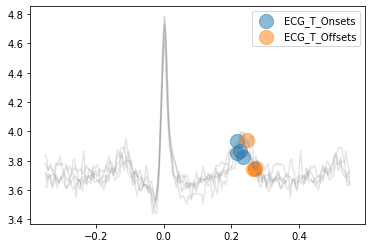

In [63]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='bounds_T')

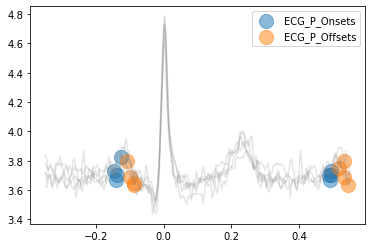

In [65]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='bounds_P')

# ok questo funziona molto meglio

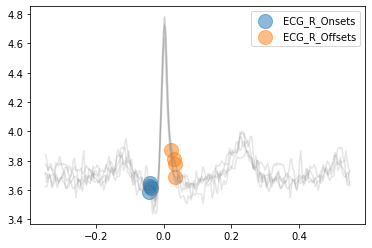

In [66]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='bounds_R')

In [68]:
waves_dwt

{'ECG_P_Peaks': [77, 239, 401, 567, 724],
 'ECG_P_Onsets': [74, 233, 397, 558, 719],
 'ECG_P_Offsets': [84, 243, 407, 572, 727],
 'ECG_Q_Peaks': [101, 265, 426, 589, 749],
 'ECG_R_Onsets': [97, 260, 422, 583, 746],
 'ECG_R_Offsets': [115, 278, 438, 603, 767],
 'ECG_S_Peaks': [130, 292, 443, 613, 777],
 'ECG_T_Peaks': [166, 330, 492, 656, 815],
 'ECG_T_Onsets': [162, 328, 488, 654, 812],
 'ECG_T_Offsets': [169, 339, 500, 663, 821]}

In [69]:
signal_dwt

ECG_P_Peaks  ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  \
0              0             0              0            0             0   
1              0             0              0            0             0   
2              0             0              0            0             0   
3              0             0              0            0             0   
4              0             0              0            0             0   
..           ...           ...            ...          ...           ...   
845            0             0              0            0             0   
846            0             0              0            0             0   
847            0             0              0            0             0   
848            0             0              0            0             0   
849            0             0              0            0             0   

     ECG_R_Offsets  ECG_S_Peaks  ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  
0                0            0            0             0              0  
1                0            0            0             0              0  
2                0            0            0             0              0  
3                0            0            0             0              0  
4                0            0            0             0              0  
..             ...          ...          ...           ...            ...  
845              0            0            0             0              0  
846              0            0            0             0              0  
847              0            0            0             0              0  
848              0            0            0             0              0  
849              0            0            0             0              0  

[850 rows x 10 columns]

### Provo con l'intero segnale

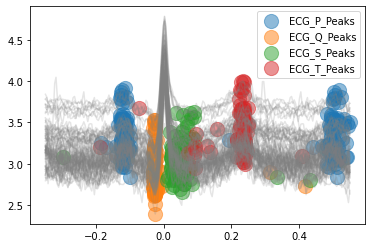

In [15]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')